# <center>Laboratorium 9<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [4]:
import main
import numpy as np
import scipy
from scipy import optimize
import matplotlib
import matplotlib.pyplot as plt
import math
import dill

expected = dill.load(open('expected','rb'))

results_bisection = expected['bisection']
f = results_bisection[12][2]
a = results_bisection[12][1]

***Temat główny:***

Znajdź miejsca zerowe funkcji: 
$$ 
f(x) = e^{-2x} + x^2 - 1 
$$,

metodami:
* Bisekcji,
* Siecznych,
* Newtona

Funkcja i jej pochodne zostały zaimplementowane w *main.py*

***Zadanie 1.***  
Wykonaj wykres funckji oraz jej pierwszej i drugiej pochodnej (obliczonej analitycznie) na jednym rysunku w przedziale pozwalającym na zgrubne określenie miejsc zerowych. Wykres powinien być odpowiednio opisany. Określ przedział miejsca zerowego.

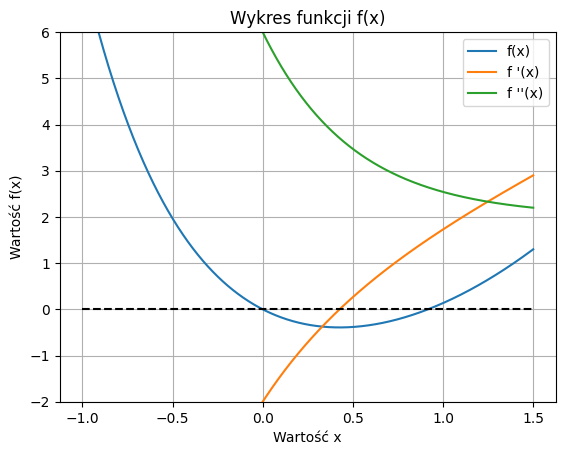

In [6]:
x = np.linspace(-1,1.5,1000)
x_axis = np.zeros(x.shape)
y = main.fun(x)
dy = main.dfun(x)
ddy = main.ddfun(x)

plt.plot(x,y)
plt.plot(x,dy)
plt.plot(x,ddy)

plt.plot(x, x_axis, "--", color="k")
plt.ylim([-2, 6])
plt.xlabel("Wartość x")
plt.ylabel('Wartość f(x)')
plt.title("Wykres funkcji f(x)")
plt.legend(("f(x)", "f \'(x)", "f \'\'(x)"))
plt.grid()
plt.show()

***Zadanie 2.***  
Zaimplementuj [metodę bisekcji](https://en.wikipedia.org/wiki/Bisection_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) funkcja na końcach przedziału przyjmuje przeciwne znaki

***Zadanie 3.***  
Zaimplementuj [metodę siecznych](https://en.wikipedia.org/wiki/Secant_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadanie 4.***  
Zaimplementuj [metodę Newtona](https://en.wikipedia.org/wiki/Newton%27s_method)

Gwarancja zbieżności:

1) funkcja jest ciągła na danym przedziale [a,b]

2) Pierwsza i druga pochodna istnieją i są ciągłe w przedziale domkniętym [a,b]

3) funkcja na końcach przedziału przyjmuje przeciwne znaki

4) pierwsza i druga pochodna mają stały znak (brak eksremów lokalnych i punktów przegięcia)


***Zadania 5.***  
Dla głównej funkcji z zadania 1 znajdź miejsca zerowe przy użyciu:

* funkcji root dostępnej w pakiecie scipy.optimize
* funkcji fsolve dostępnej w pakiecie scipy.optimize


In [7]:
#Funkcja root dostępna w pakiecie scipy.optimize
roots_r = scipy.optimize.root(main.fun, [0, 1])
print(f"Miejsca zerowe: {roots_r.x}")

#Funkcja fsolve dostępna w pakiecie scipy.optimize
roots_fs = scipy.optimize.fsolve(main.fun, [0, 1])
print(f"Miejsca zerowe: {roots_fs}")

Miejsca zerowe: [0.         0.91656258]
Miejsca zerowe: [0.         0.91656258]


***Zadanie 6.***  
Dla głównej funkcji oraz przedziału zdefiniowanego z zadania 1 znajdź miejsca zerowe przy użyciu:

* metody bisekcji
* metody siecznych
* metody Newtona

z tolerancją $10^{-10}$

Zbadaj dokładność(względem rozwiązania z zadania 5) i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach. 

None
None
W przedziale [-0.25,0.5] otrzymujemy:
Pierwsze miejsce zerowe: -5.820766091346741e-11
Ilość iteracji: 32


W przedziale [0.5,1] otrzymujemy:
Drugie miejsce zerowe: 0.9165625830646604
Ilość iteracji: 30


The slowest run took 5.66 times longer than the fastest. This could mean that an intermediate result is being cached.
2.03 µs ± 1.04 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 325.14 times longer than the fastest. This could mean that an intermediate result is being cached.
5.47 µs ± 35.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 23.49 times longer than the fastest. This could mean that an intermediate result is being cached.
3.01 µs ± 2.96 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 12.09 times longer than the fastest. This could mean that an intermediate result is being cached.
2.01 µs ± 1.38 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest ru

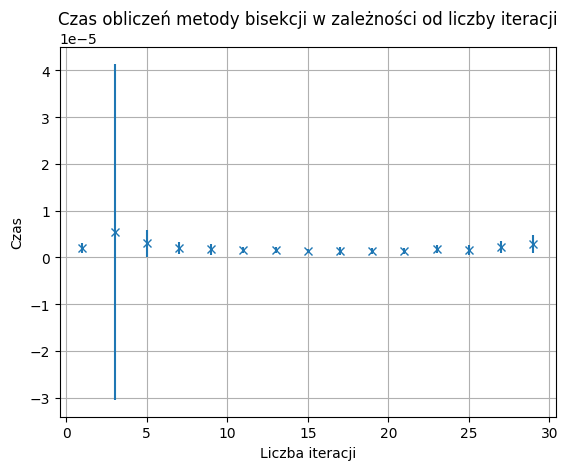

In [9]:
#Metoda bisekcji
epsilon = 1e-10
iterations = 100    #ilość iteracji
print(main.bisection(-0.25,1, main.fun, epsilon, iterations))
print(main.bisection(-0.25,1.5, main.fun, epsilon, iterations))

#Powyższa funkcja zwraca wartości None, ponieważ nie jest spełniony warunek o różnych znakach funkcji na końcach przedziału, co jest widoczne we wcześniejszym zadaniu. Przedziały spełniające warunki prezentują się następująco:

roots_1b, iteration_1b = main.bisection(-0.25,0.5, main.fun, epsilon, iterations)
roots_2b, iteration_2b = main.bisection(0.5,1, main.fun, epsilon, iterations)
print("W przedziale [-0.25,0.5] otrzymujemy:")
print(f"Pierwsze miejsce zerowe: {roots_1b}")
print(f"Ilość iteracji: {iteration_1b}")

print("\n")

print("W przedziale [0.5,1] otrzymujemy:")
print(f"Drugie miejsce zerowe: {roots_2b}")
print(f"Ilość iteracji: {iteration_2b}")

print("\n")

#Czas obliczeń metody bisekcji w zależności od liczby iteracji
err = []
time = []
x = np.arange(1, 30, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.bisection(-0.25, 0.5, main.fun, 1e-10, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(x, time,yerr=err, marker="x", linestyle='None')
plt.title("Czas obliczeń metody bisekcji w zależności od liczby iteracji")
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.grid()
plt.show()

None
None
W przedziale [-0.25,0.5] otrzymujemy:
Pierwsze miejsce zerowe: 3.047641981879564e-11
Ilość iteracji: 19


W przedziale [0.5,1] otrzymujemy:
Drugie miejsce zerowe: 0.9165625830854545
Ilość iteracji: 8


1.39 µs ± 454 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 17.55 times longer than the fastest. This could mean that an intermediate result is being cached.
2.6 µs ± 2.33 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 4.37 times longer than the fastest. This could mean that an intermediate result is being cached.
2.06 µs ± 910 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 12.31 times longer than the fastest. This could mean that an intermediate result is being cached.
1.72 µs ± 1.41 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 8.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1.84 µs ± 1.15 µs per

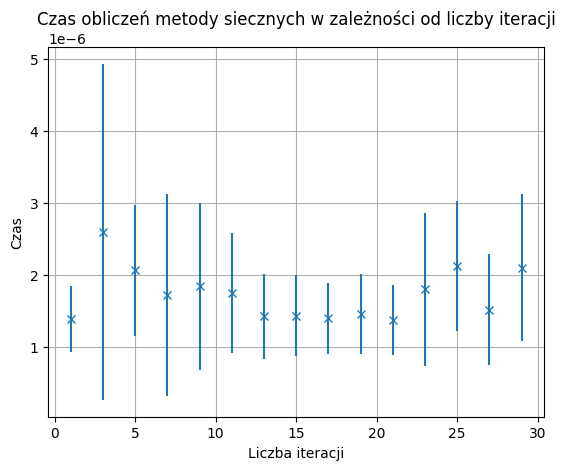

In [10]:
#Metoda siecznych 
epsilon = 1e-10
iterations = 100    #ilość iteracji
print(main.bisection(-0.25,1, main.fun, epsilon, iterations))
print(main.bisection(-0.25,1.5, main.fun, epsilon, iterations))

#Powyższa funkcja zwraca warości None, ponieważ nie jest spełniony warunek tak jak we wcześniejszej metodzie (bisekcji). Przedziały spełniające warunki prezentują się następująco:

roots_1s, iteration_1s = main.secant(-0.25,0.5, main.fun, epsilon, iterations)
roots_2s, iteration_2s = main.secant(0.5,1, main.fun, epsilon, iterations)
print("W przedziale [-0.25,0.5] otrzymujemy:")
print(f"Pierwsze miejsce zerowe: {roots_1s}")
print(f"Ilość iteracji: {iteration_1s}")

print("\n")

print("W przedziale [0.5,1] otrzymujemy:")
print(f"Drugie miejsce zerowe: {roots_2s}")
print(f"Ilość iteracji: {iteration_2s}")

print("\n")

#Czas obliczeń metody siecznych w zależności od liczby iteracji
err = []
time = []
x = np.arange(1, 30, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.secant(-0.25, 0.5, main.fun, epsilon, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(x, time,yerr=err, marker="x", linestyle='None')
plt.title("Czas obliczeń metody siecznych w zależności od liczby iteracji")
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.grid()
plt.show()

None
None
W przedziale [-0.25,0.5] otrzymujemy:
Pierwsze miejsce zerowe: -5.2465474697379417e-17
Ilość iteracji: 5


W przedziale [0.5,1] otrzymujemy:
Drugie miejsce zerowe: 0.9165625831056982
Ilość iteracji: 4


The slowest run took 4.66 times longer than the fastest. This could mean that an intermediate result is being cached.
2.36 µs ± 953 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 16.35 times longer than the fastest. This could mean that an intermediate result is being cached.
2.83 µs ± 2.9 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
1.46 µs ± 511 ns per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 14.67 times longer than the fastest. This could mean that an intermediate result is being cached.
3.09 µs ± 2.47 µs per loop (mean ± std. dev. of 100 runs, 100 loops each)
The slowest run took 41.81 times longer than the fastest. This could mean that an intermediate result is being cached.
3.75 µs ± 5.68 µs p

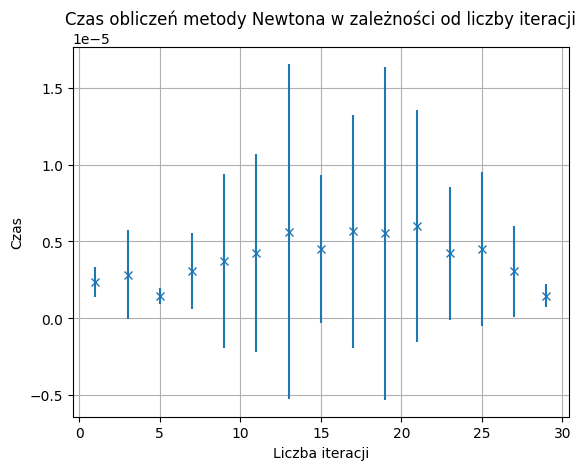

In [14]:
#Metoda Newtona
epsilon = 1e-10
iterations = 100    #ilość iteracji
print(main.newton(main.fun,main.dfun, main.ddfun, -0.25, 1, epsilon, iterations))
print(main.newton(main.fun,main.dfun, main.ddfun, -0.25, 1.5, epsilon, iterations))

#Powyższa funkcja zwraca warości None, ponieważ nie jest spełniony warunek tak jak we wcześniejszej metodach (bisekcji i siecznych). Przedziały spełniające warunki prezentują się następująco:

roots_1n, iteration_1n = main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.1, epsilon, iterations)
roots_2n, iteration_2n = main.newton(main.fun, main.dfun, main.ddfun, 0.5, 1, epsilon, iterations)
print("W przedziale [-0.25,0.5] otrzymujemy:")
print(f"Pierwsze miejsce zerowe: {roots_1n}")
print(f"Ilość iteracji: {iteration_1n}")

print("\n")

print("W przedziale [0.5,1] otrzymujemy:")
print(f"Drugie miejsce zerowe: {roots_2n}")
print(f"Ilość iteracji: {iteration_2n}")

print("\n")

#Czas obliczeń metody Newtona w zależności od liczby iteracji
err = []
time = []
x = np.arange(1, 30, 2)
for i in x:
    avg_time = %timeit -r 100 -n 100 -o main.newton(main.fun, main.dfun, main.ddfun, -0.25, 0.2, epsilon, iteration=i)
    time.append(avg_time.average)
    err.append(avg_time.stdev)

plt.errorbar(x, time,yerr=err, marker="x", linestyle='None')
plt.title("Czas obliczeń metody Newtona w zależności od liczby iteracji")
plt.ylabel("Czas")
plt.xlabel("Liczba iteracji")
plt.grid()
plt.show()

0.0
0.9165625831056987


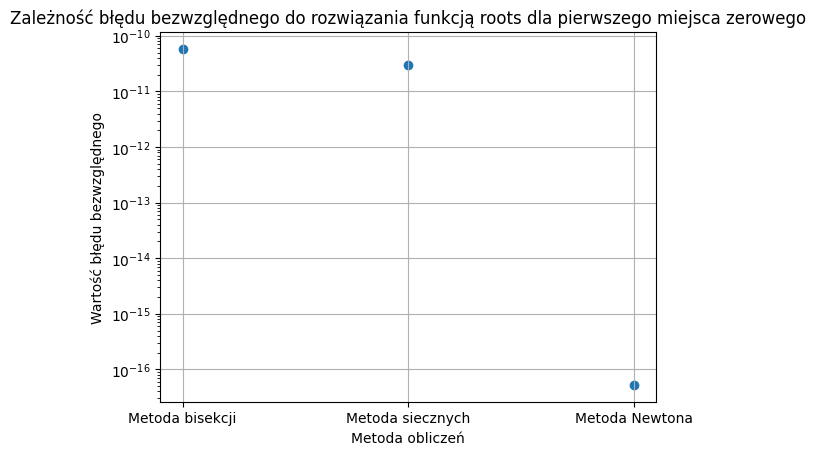

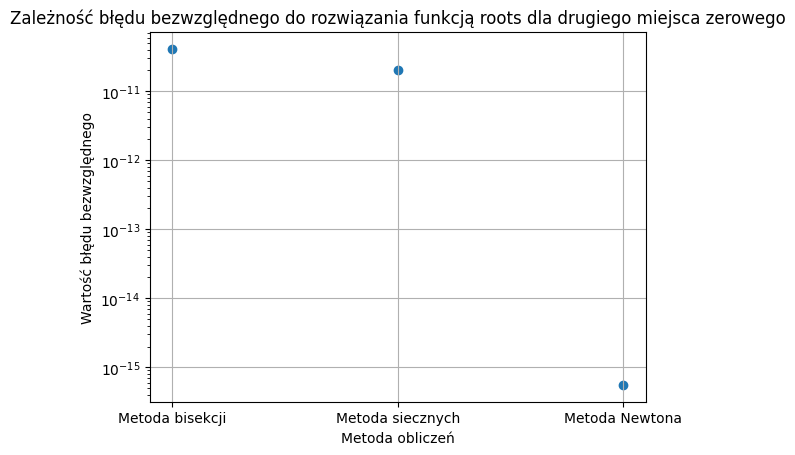

In [15]:
#Porównanie dokładności wyników 

roots1 = roots_r.x[0]
roots2 = roots_r.x[1]

print(roots1)
print(roots2)

#Obliczenie błędu bezwzględnego pomiędzy rozwiązaniami metodami z 6 zadania, a wzorowym rozwiązaniem metodą roots z pakietu scipy.optimize z zadania 5

#Metoda bisekcji
b_err1 = np.abs(roots1-roots_1b)
b_err2 = np.abs(roots2-roots_2b)

#Metoda siecznych
s_err1 = np.abs(roots1-roots_1s)
s_err2 = np.abs(roots2-roots_2s)

#Metoda Newtona
n_err1 = np.abs(roots1-roots_1n)
n_err2 = np.abs(roots2-roots_2n)



first_root = [b_err1,s_err1, n_err1]
second_root = [b_err2,s_err2, n_err2]
x_axis = ["Metoda bisekcji", "Metoda siecznych", "Metoda Newtona" ]

plt.scatter(x_axis, first_root)
plt.xlabel("Metoda obliczeń")
plt.ylabel("Wartość błędu bezwzględnego")
plt.title("Zależność błędu bezwzględnego do rozwiązania funkcją roots dla pierwszego miejsca zerowego")
plt.grid()
plt.semilogy()
plt.show()

plt.scatter(x_axis, second_root)
plt.xlabel("Metoda obliczeń")
plt.ylabel("Wartość błędu bezwzględnego")
plt.title("Zależność błędu bezwzględnego do rozwiązania funkcją roots dla drugiego miejsca zerowego")
plt.grid()
plt.semilogy()
plt.show()

**Wnioski**

Podczas labolatorium zapoznałam się z iteracyjnymi metodami (biekcji, siecznych, Newtona) wyliczania miejsc zerowych równań nieliniowych. Do obliczenia wartości miejsc zerowych skorzystałam również z funkcji root i fsolve z pakietu scipy.optimize. Z otrzymanych wykresów można wywnioskować, że to metoda Newtona otrzymuje najbliższe wartości co do oczekiwanego wyniku, ale wykonuje obliczenia najdłużej w porównaniu z metodami z tego labolatorium. Biorąc pod uwagę wszystkie czynniki tj. czas wykonywania i najmniejszy otrzymany błąd obliczeń najlepszą spośród wszystkich metod jest metoda siecznych.